In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Guvi May/UCI_Credit_Card.csv')
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
cols = list(df.columns)
cols[-1] = 'pnm'
df.columns = cols

In [ ]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,pnm
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,pnm
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [ ]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
pnm          0
dtype: int64

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'pnm'],
      dtype='object')

### **Data Cleaning**

**ID: ID of each client**

In [ ]:
df.drop(['ID'], axis = 1, inplace = True)

In [ ]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,pnm
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


**LIMIT_BAL: Amount of given credit in NT dollars (includes individual and
family/supplementary credit**

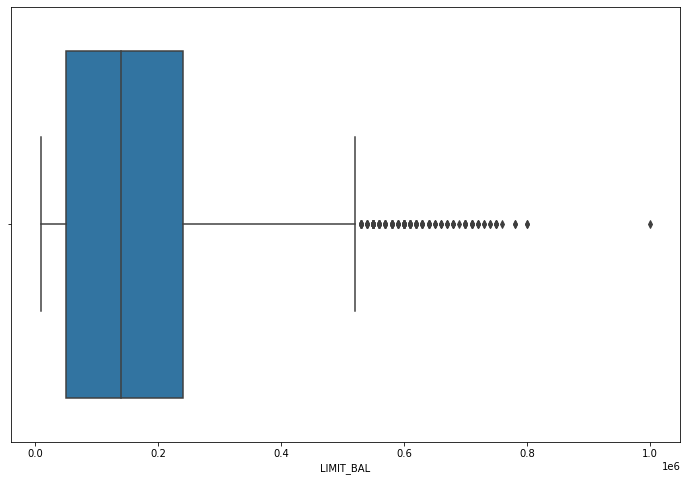

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.boxplot(df['LIMIT_BAL'])
plt.show()

In [ ]:
df[df['LIMIT_BAL'] == df['LIMIT_BAL'].max()]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,pnm
2197,1000000.0,2,1,1,47,0,0,0,-1,0,...,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0


In [ ]:
df.shape

(30000, 24)

In [ ]:
df.drop(index = 2197, inplace = True)

In [ ]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,pnm
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


**SEX: Gender (1=male, 2=female)**

In [ ]:
df['SEX'].value_counts()

2    18111
1    11888
Name: SEX, dtype: int64

**EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others,
5=unknown, 6=unknown)**

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10584
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

**MARRIAGE: Marital status (1=married, 2=single, 3=others)**

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13658
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,pnm
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


**AGE: Age in years**

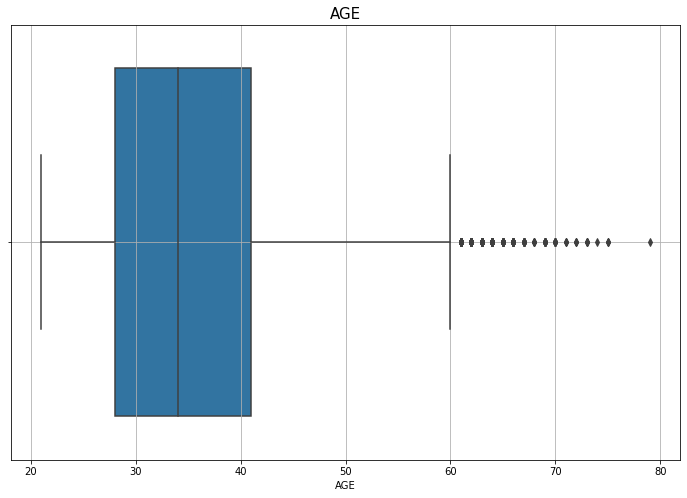

In [ ]:
sns.boxplot(df['AGE'])
plt.title('AGE', size = 15)
plt.grid()
plt.show()

In [ ]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,pnm
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'pnm'],
      dtype='object')

**PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for
one month, 2=payment delay for two months, … 8=payment delay for eight
months, 9=payment delay for nine months and above)**

In [ ]:
df['PAY_0'].value_counts()

 0    14736
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [ ]:
df['PAY_2'].value_counts()

 0    15729
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [ ]:
df['PAY_3'].value_counts()

 0    15763
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [ ]:
df['PAY_4'].value_counts()

 0    16455
-1     5686
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64

In [ ]:
df['PAY_5'].value_counts()

 0    16946
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

In [ ]:
df['PAY_6'].value_counts()

 0    16285
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'pnm'],
      dtype='object')

**BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)**

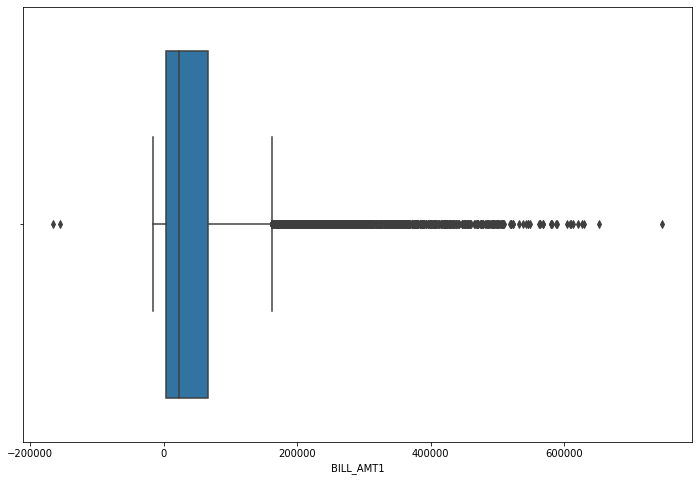

In [ ]:
sns.boxplot(df['BILL_AMT1'])
plt.show()

In [ ]:
df.drop(index = list(df[df['BILL_AMT1'] < -100000]['BILL_AMT1'].index), inplace = True)

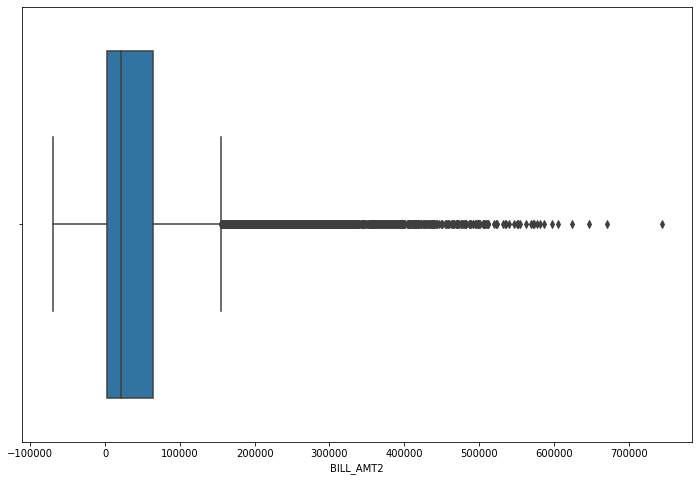

In [ ]:
sns.boxplot(df['BILL_AMT2'])
plt.show()

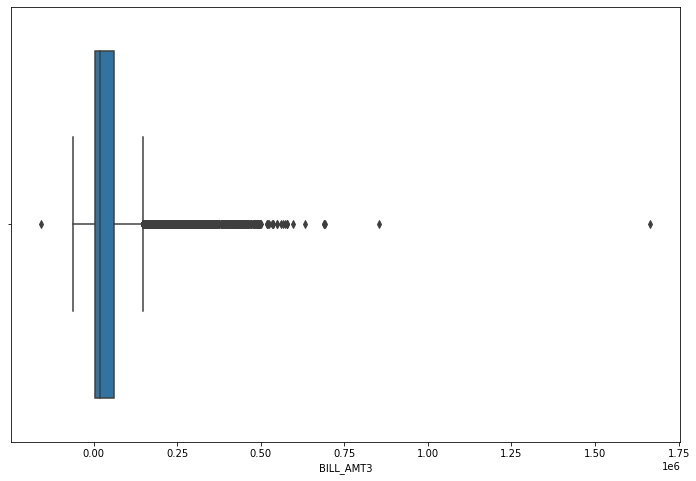

In [ ]:
sns.boxplot(df['BILL_AMT3'])
plt.show()

In [ ]:
df.drop(index = df[df['BILL_AMT3'] == df['BILL_AMT3'].max()].index[0], inplace = True)

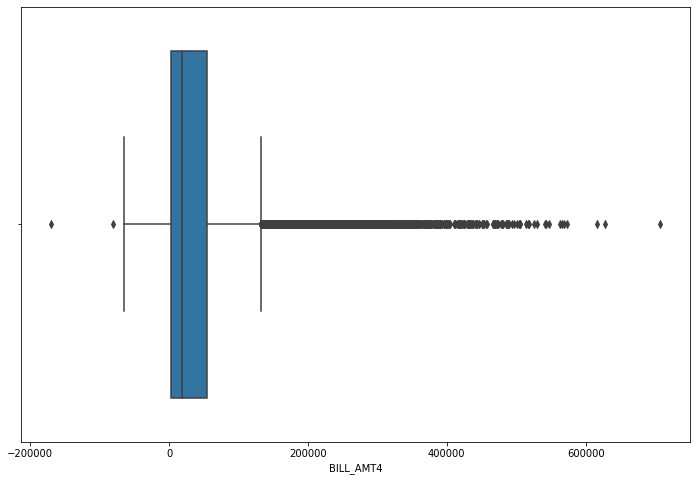

In [ ]:
sns.boxplot(df['BILL_AMT4'])
plt.show()

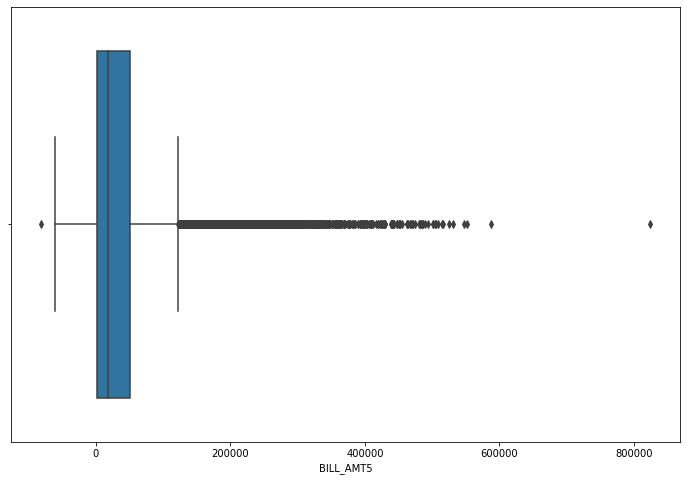

In [ ]:
sns.boxplot(df['BILL_AMT5'])
plt.show()

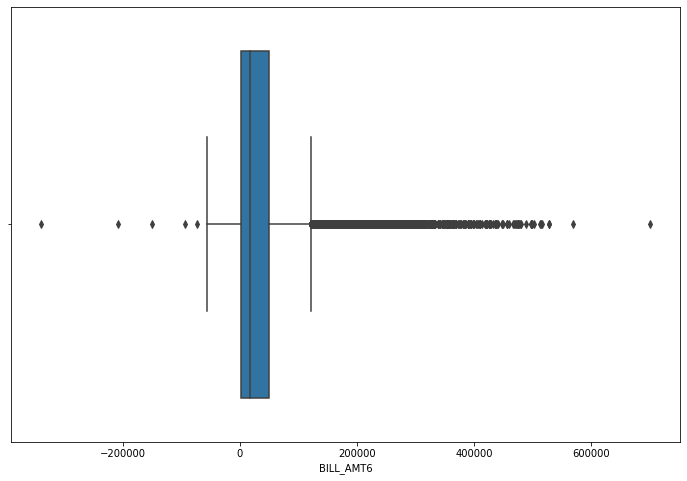

In [ ]:
sns.boxplot(df['BILL_AMT6'])
plt.show()

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'pnm'],
      dtype='object')

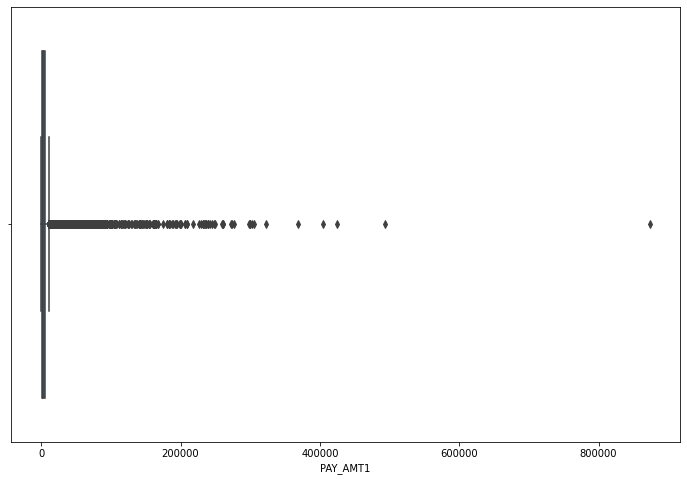

In [ ]:
sns.boxplot(df['PAY_AMT1'])
plt.show()

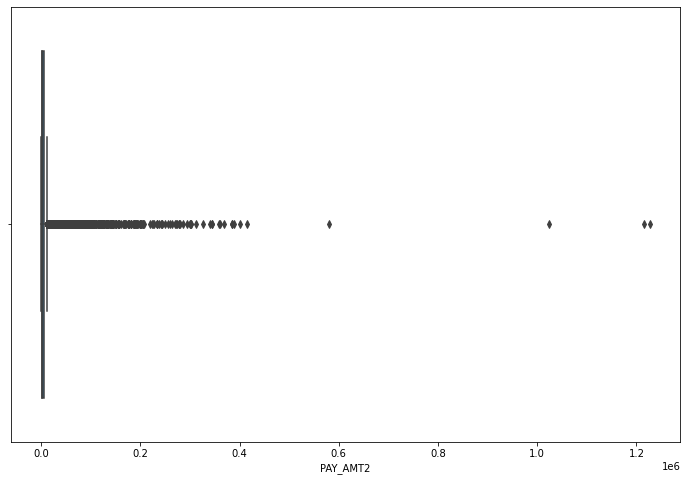

In [ ]:
sns.boxplot(df['PAY_AMT2'])
plt.show()

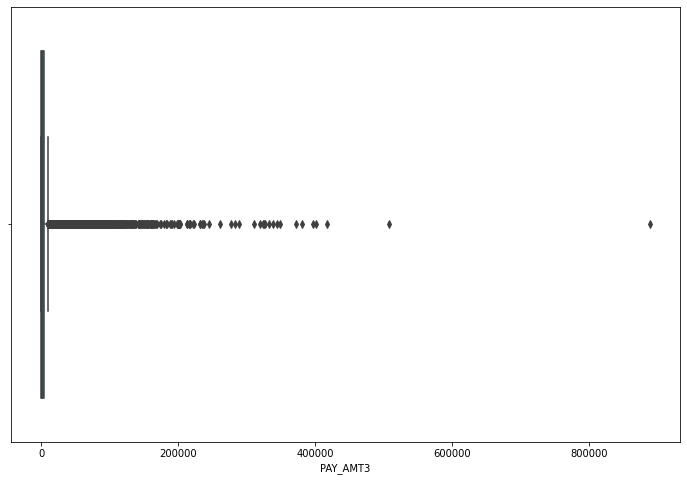

In [ ]:
sns.boxplot(df['PAY_AMT3'])
plt.show()

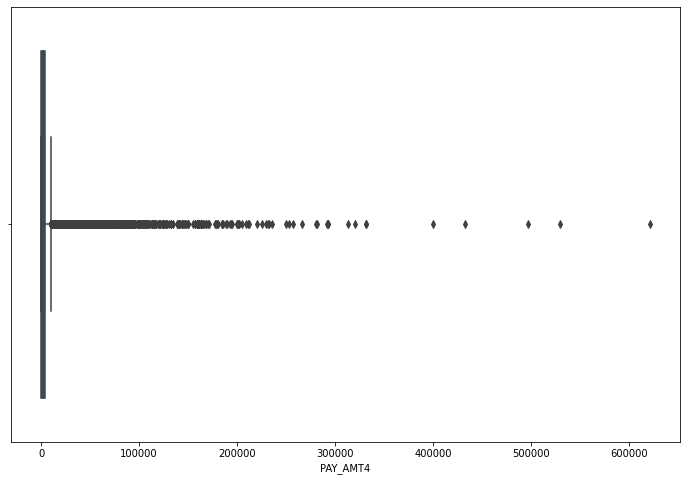

In [ ]:
sns.boxplot(df['PAY_AMT4'])
plt.show()

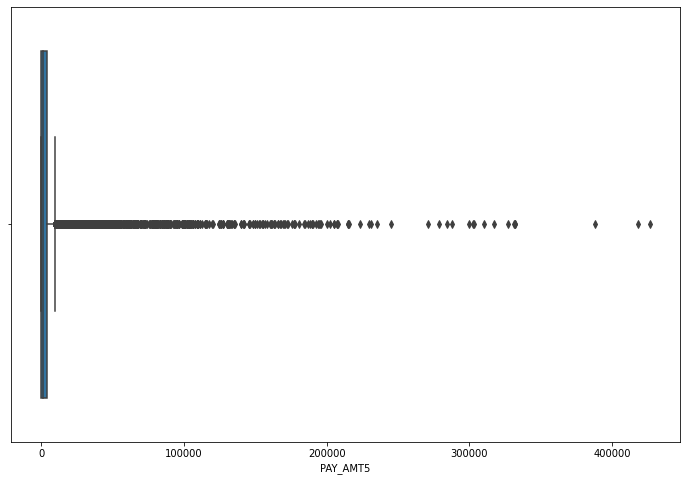

In [ ]:
sns.boxplot(df['PAY_AMT5'])
plt.show()

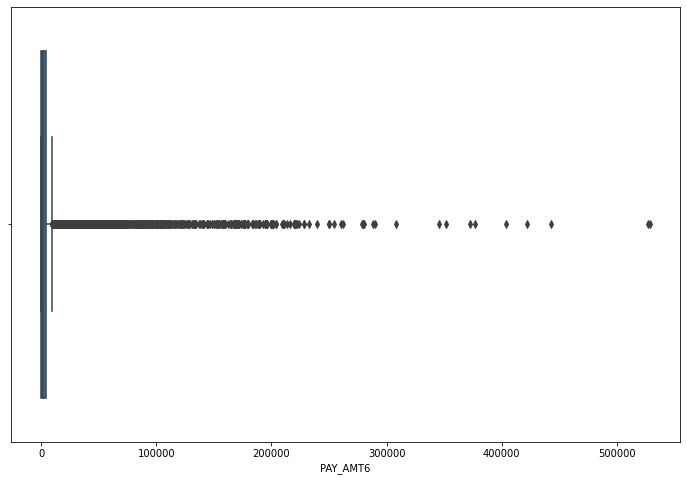

In [ ]:
sns.boxplot(df['PAY_AMT6'])
plt.show()

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'pnm'],
      dtype='object')

### EDA

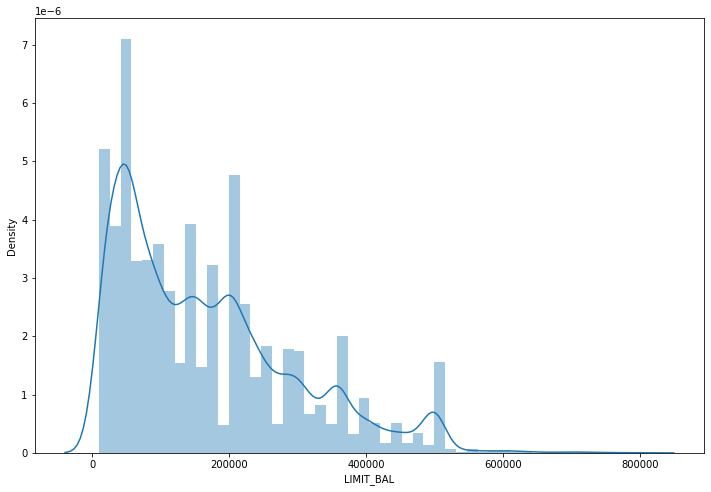

In [ ]:
sns.distplot(df['LIMIT_BAL'])
plt.show()

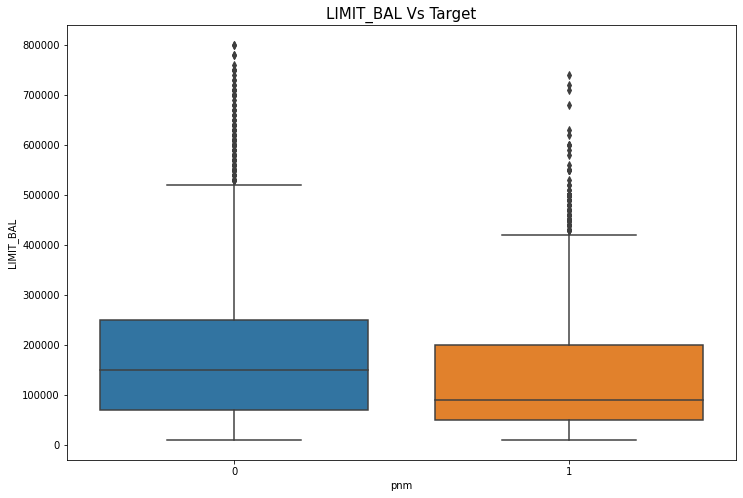

In [ ]:
sns.boxplot(df['pnm'], df['LIMIT_BAL'])
plt.title('LIMIT_BAL Vs Target', size = 15)
plt.show()

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'pnm'],
      dtype='object')

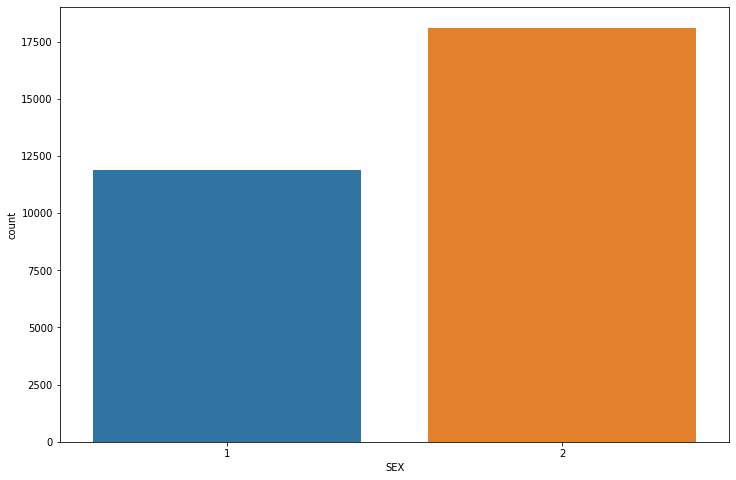

In [ ]:
sns.countplot(df['SEX'])
plt.show()

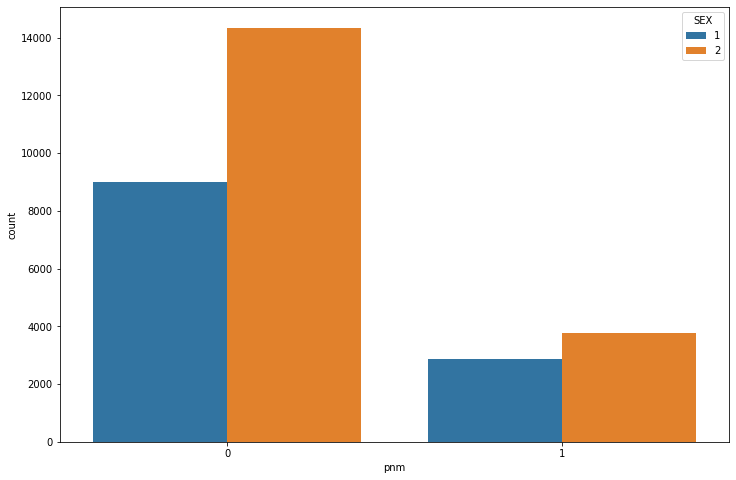

In [ ]:
sns.countplot(df['pnm'], hue = df['SEX'])

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'pnm'],
      dtype='object')

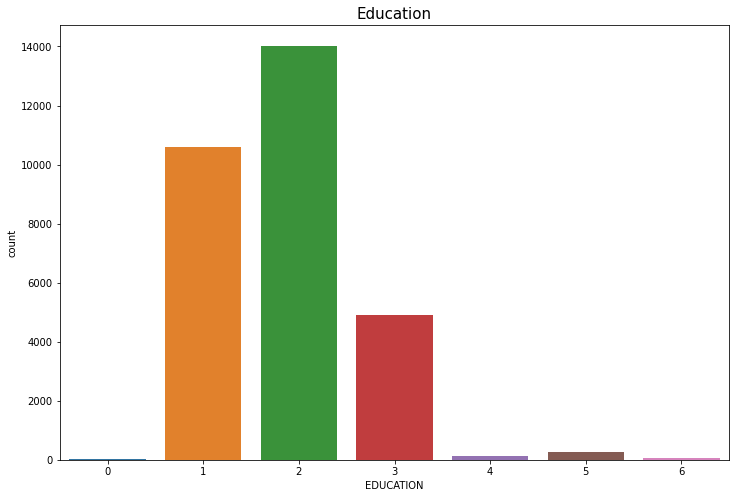

In [ ]:
sns.countplot(df['EDUCATION'])
plt.title('Education', size = 15)
plt.show()

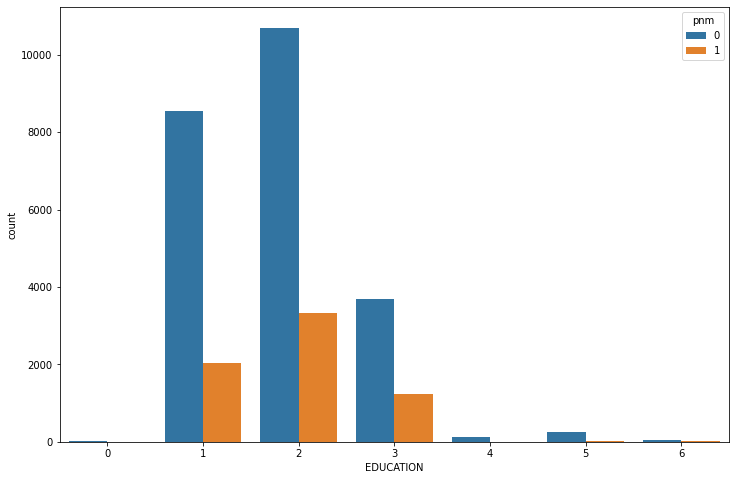

In [ ]:
sns.countplot(df['EDUCATION'], hue = df['pnm'])
plt.show()

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'pnm'],
      dtype='object')

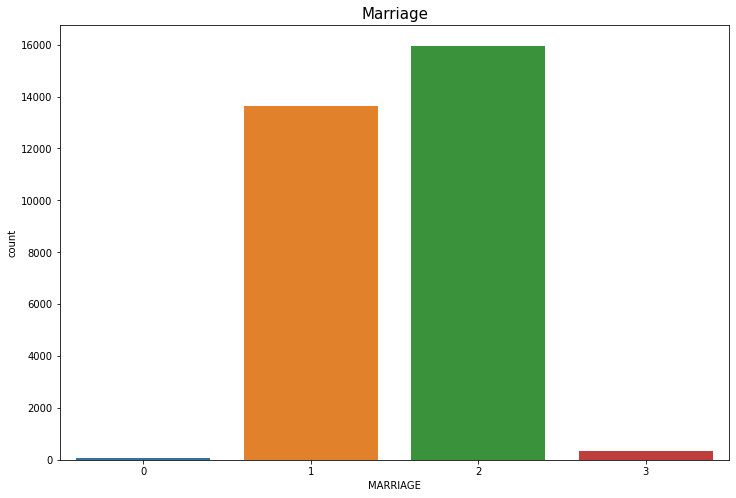

In [ ]:
sns.countplot(df['MARRIAGE'])
plt.title('Marriage', size = 15)
plt.show()

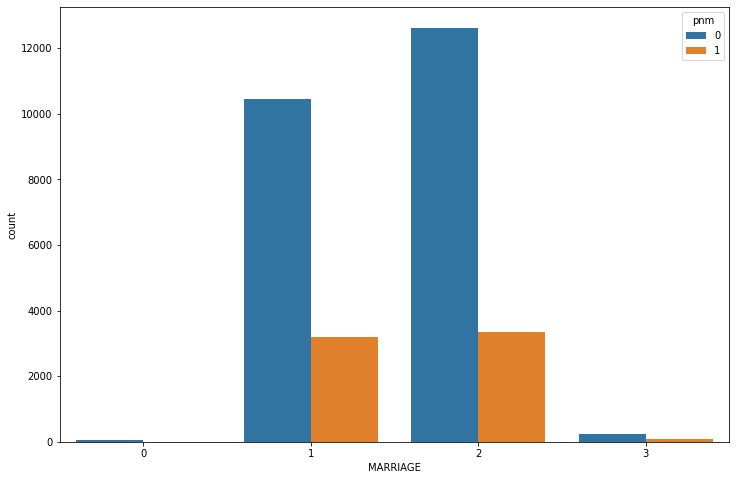

In [ ]:
sns.countplot(df['MARRIAGE'], hue = df['pnm'])
plt.show()

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'pnm'],
      dtype='object')

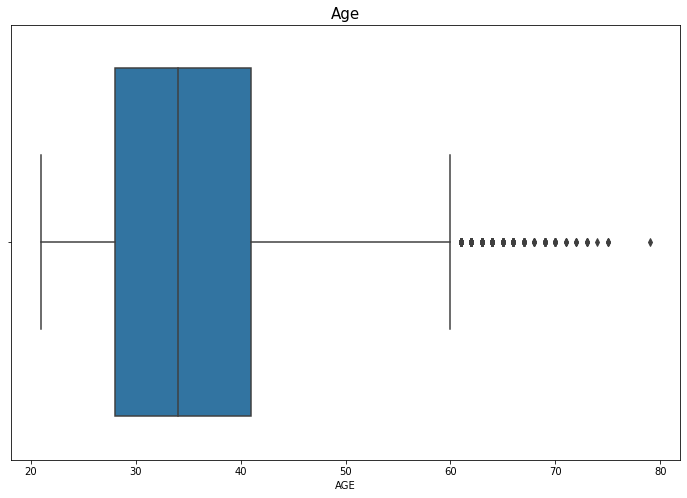

In [ ]:
sns.boxplot(df['AGE'])
plt.title('Age', size = 15)
plt.show()

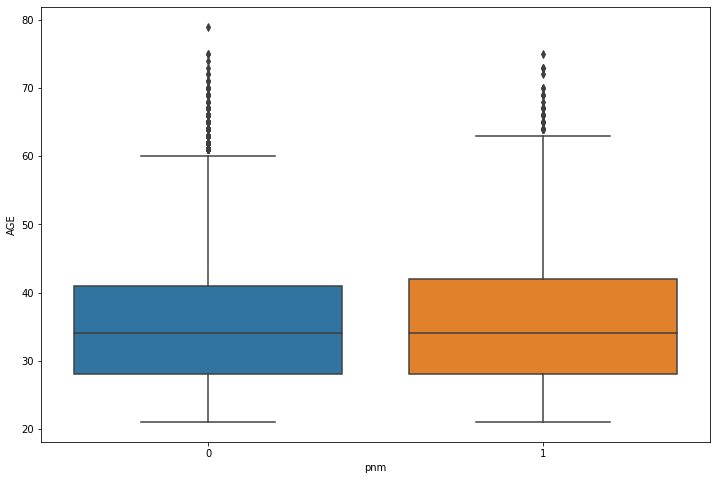

In [ ]:
sns.boxplot(x = df['pnm'], y = df['AGE'])
plt.show()

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'pnm'],
      dtype='object')

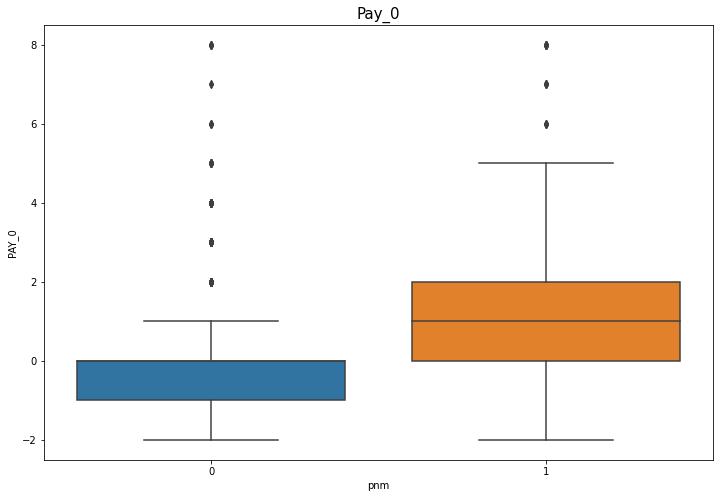

In [ ]:
sns.boxplot(df['pnm'], df['PAY_0'])
plt.title('Pay_0', size = 15)
plt.show()

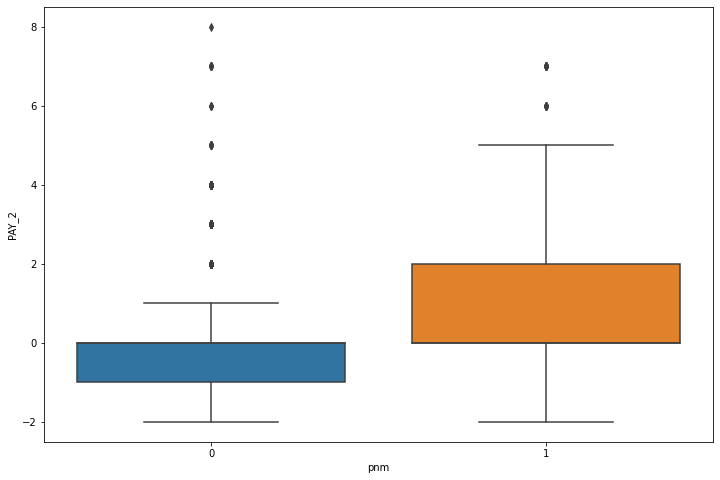

In [ ]:
sns.boxplot(df['pnm'], df['PAY_2'])
plt.show()

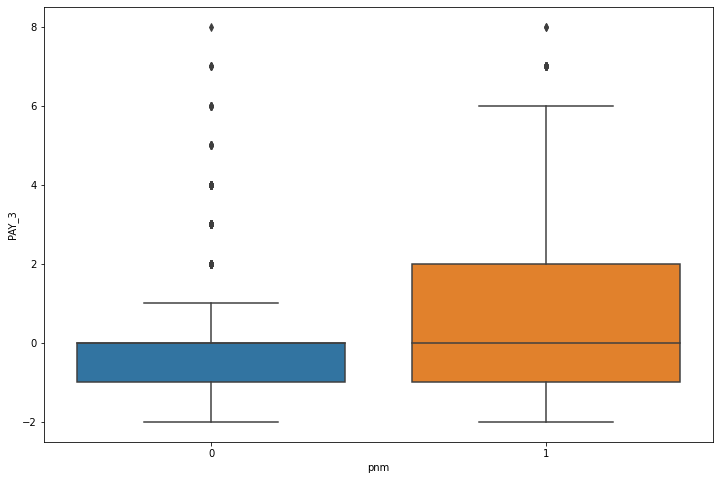

In [ ]:
sns.boxplot(df['pnm'], df['PAY_3'])
plt.show()

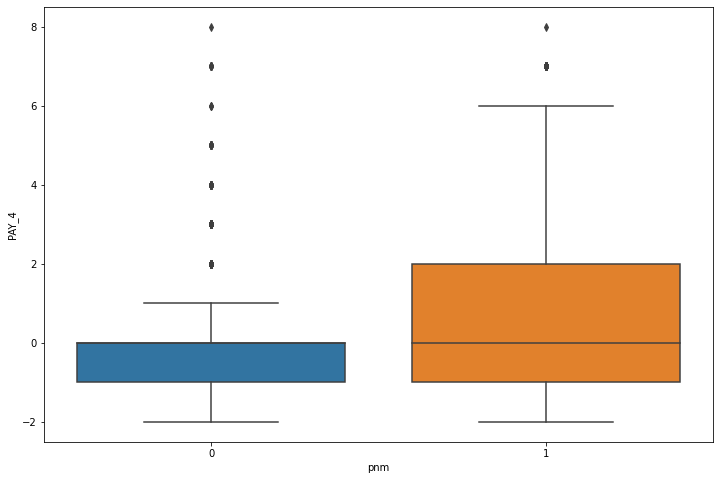

In [ ]:
sns.boxplot(df['pnm'], df['PAY_4'])
plt.show()

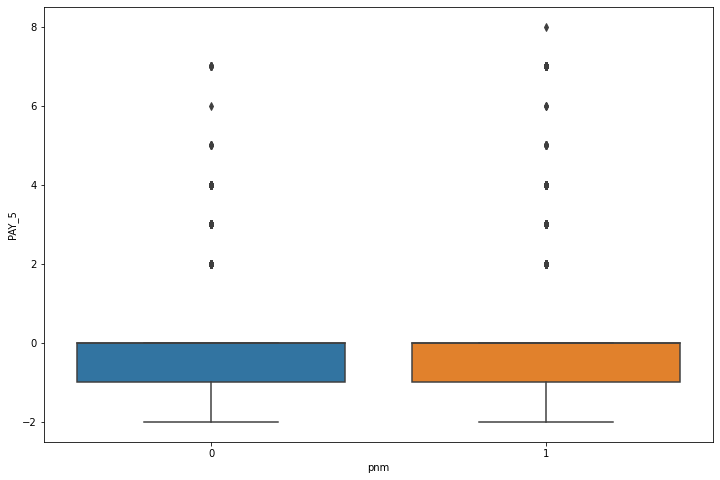

In [ ]:
sns.boxplot(df['pnm'], df['PAY_5'])
plt.show()

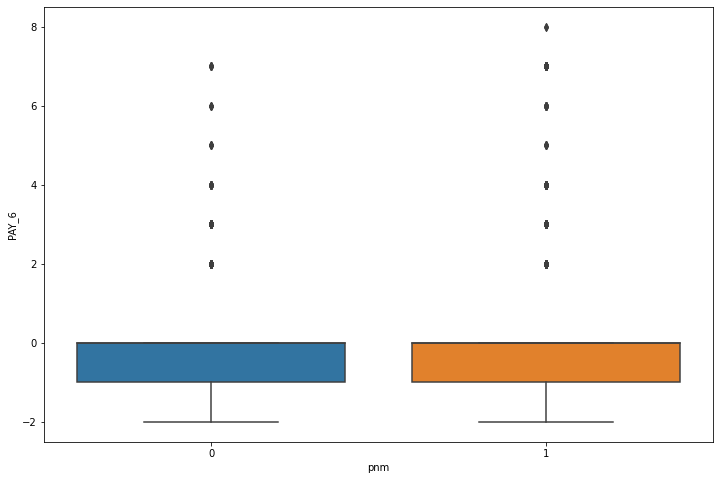

In [ ]:
sns.boxplot(df['pnm'], df['PAY_6'])
plt.show()

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'pnm'],
      dtype='object')

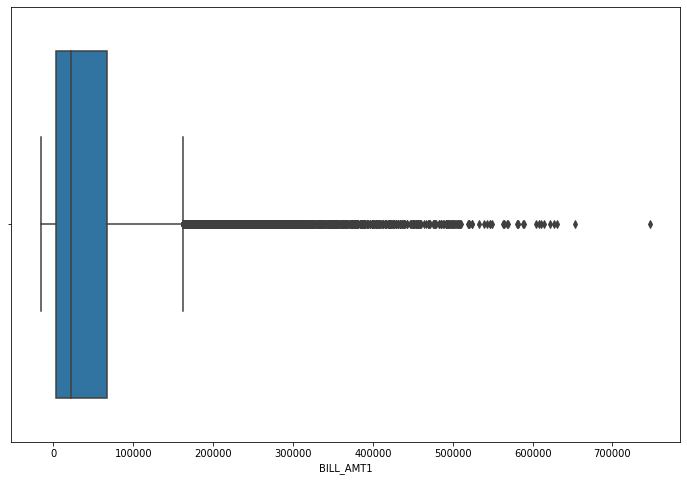

In [ ]:
sns.boxplot(df['BILL_AMT1'])
plt.show()

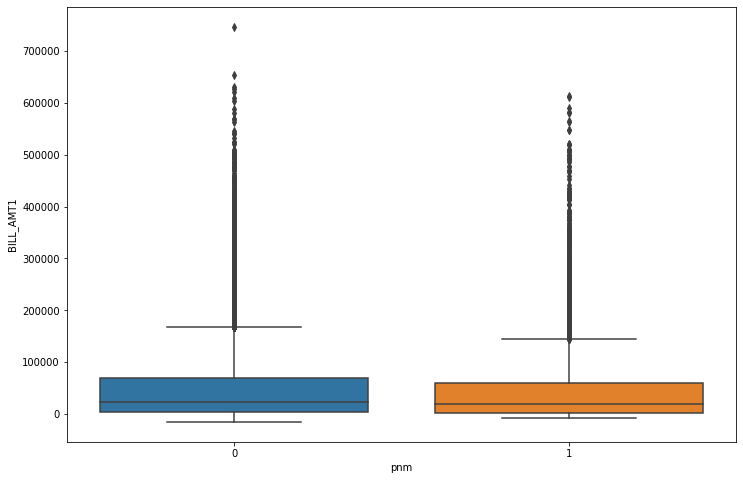

In [ ]:
sns.boxplot(df['pnm'], df['BILL_AMT1'])
plt.show()

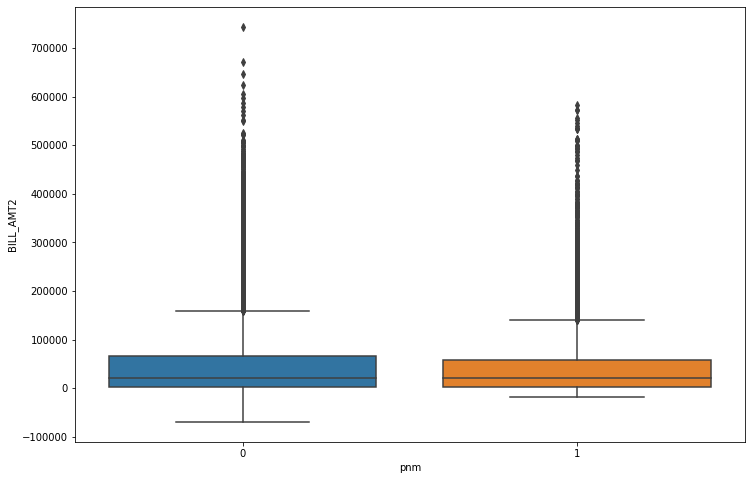

In [ ]:
sns.boxplot(df['pnm'], df['BILL_AMT2'])
plt.show()

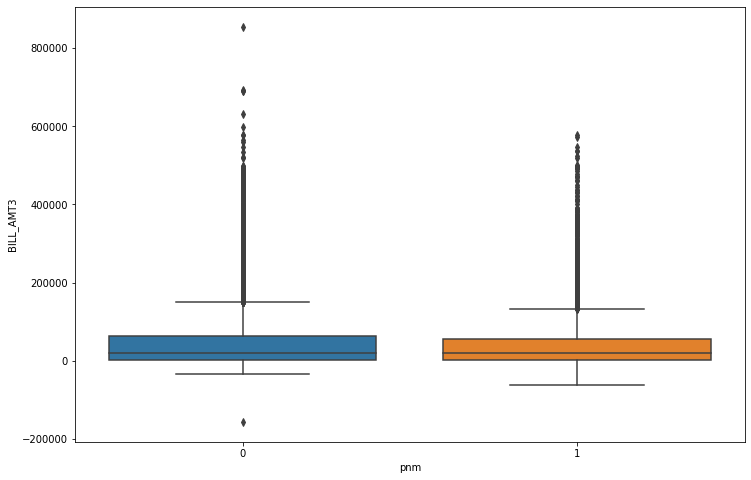

In [ ]:
sns.boxplot(df['pnm'], df['BILL_AMT3'])
plt.show()

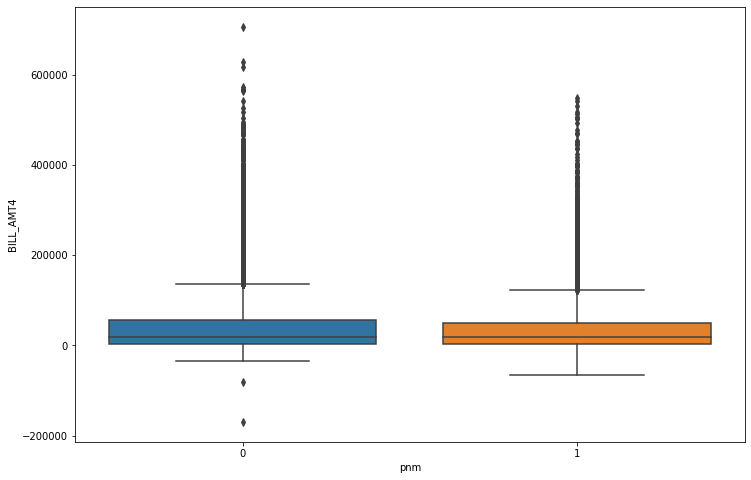

In [ ]:
sns.boxplot(df['pnm'], df['BILL_AMT4'])
plt.show()

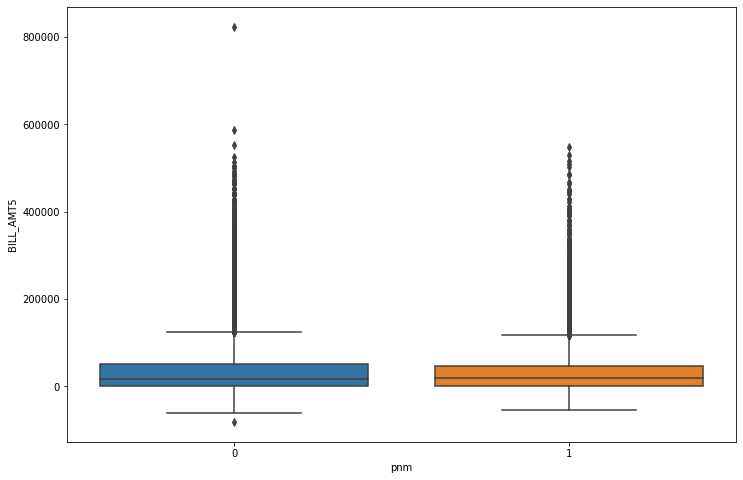

In [ ]:
sns.boxplot(df['pnm'], df['BILL_AMT5'])
plt.show()

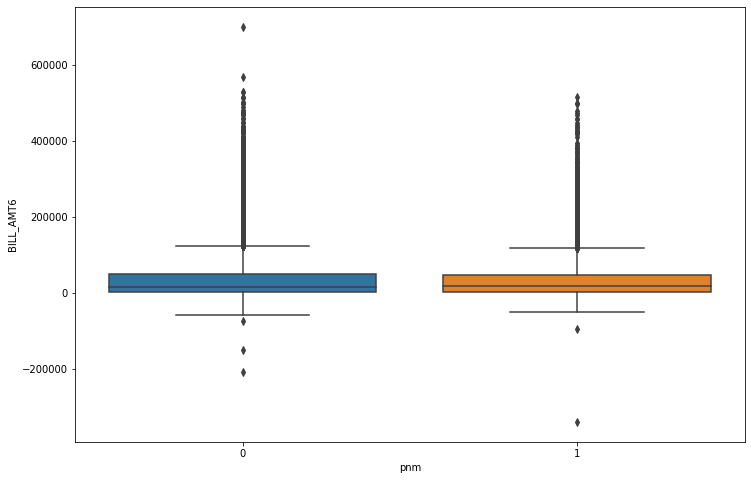

In [ ]:
sns.boxplot(df['pnm'], df['BILL_AMT6'])
plt.show()

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'pnm'],
      dtype='object')

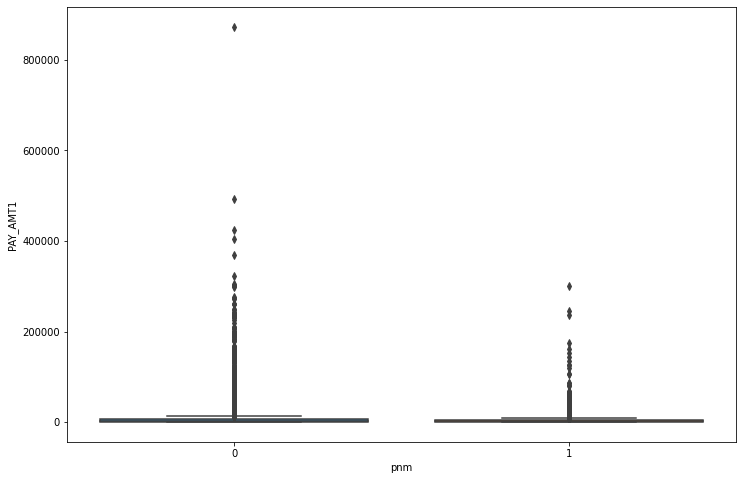

In [ ]:
sns.boxplot(df['pnm'], df['PAY_AMT1'])
plt.show()

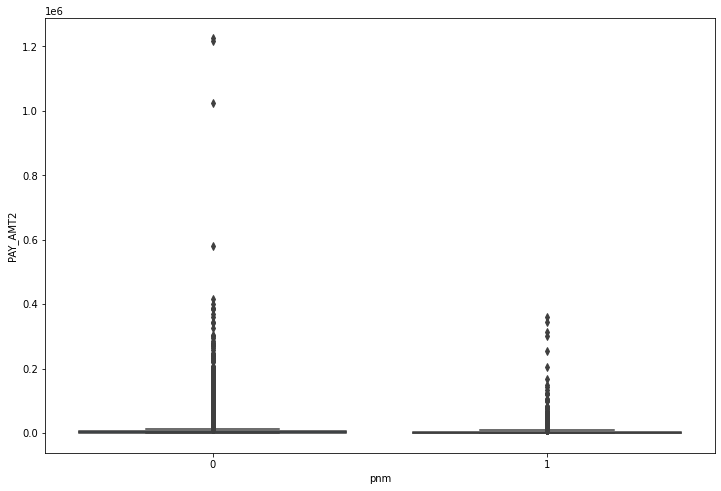

In [ ]:
sns.boxplot(df['pnm'], df['PAY_AMT2'])
plt.show()

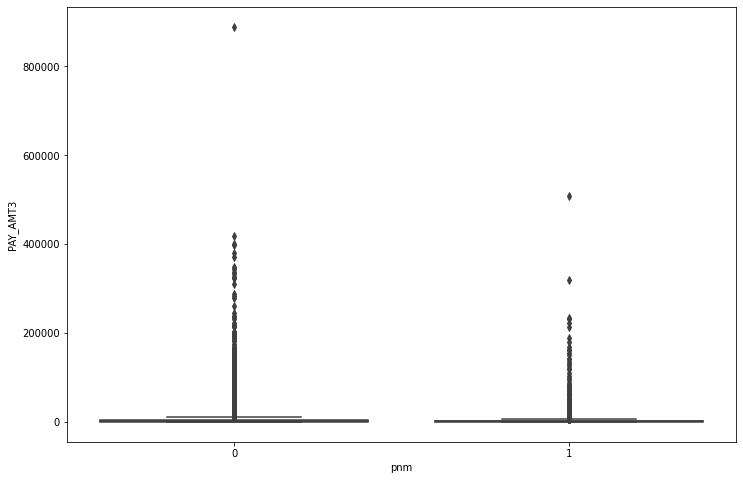

In [ ]:
sns.boxplot(df['pnm'], df['PAY_AMT3'])
plt.show()

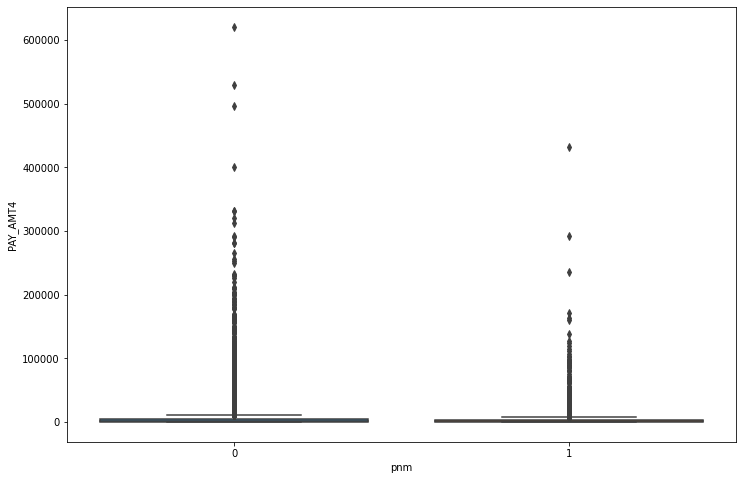

In [ ]:
sns.boxplot(df['pnm'], df['PAY_AMT4'])
plt.show()

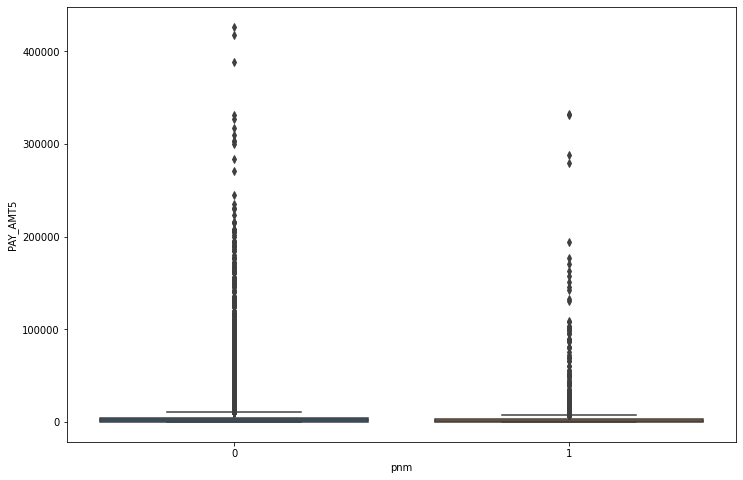

In [ ]:
sns.boxplot(df['pnm'], df['PAY_AMT5'])
plt.show()

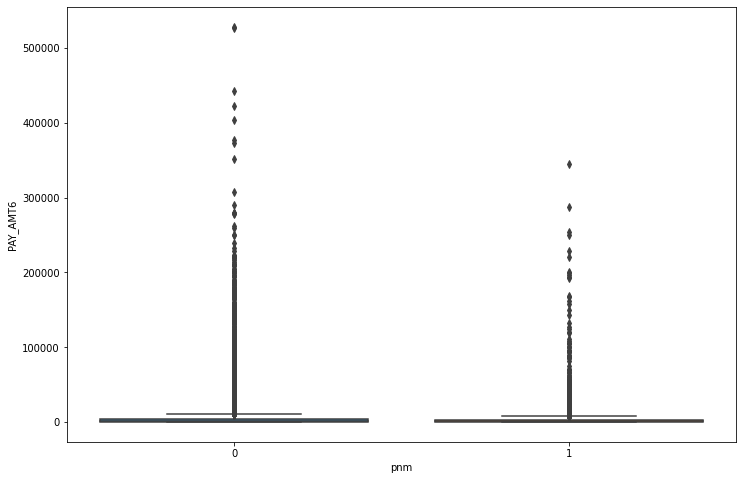

In [ ]:
sns.boxplot(df['pnm'], df['PAY_AMT6'])
plt.show()

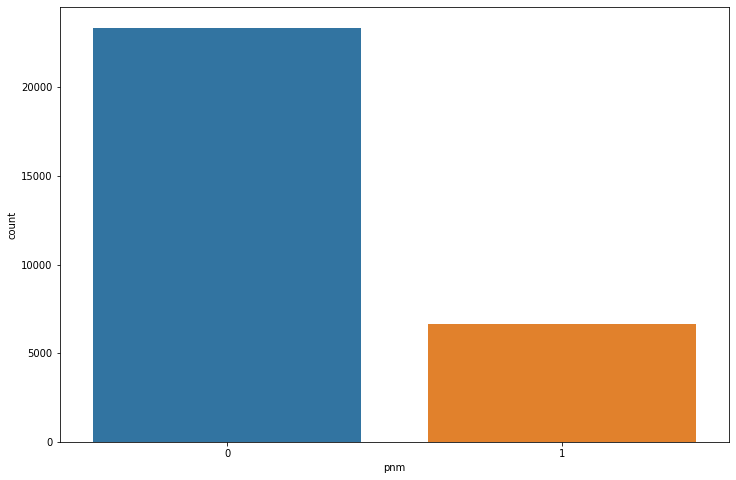

In [ ]:
sns.countplot(df['pnm'])
plt.show()

In [ ]:
df['pnm'].value_counts()

0    23360
1     6636
Name: pnm, dtype: int64

Target is imbalanced

In [ ]:
#plt.figure(figsize = (18, 18))
#sns.pairplot(df)
#plt.show()

In [ ]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,pnm
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [ ]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
pnm          0
dtype: int64

In [ ]:
X = df.drop(['pnm'], axis = 1).copy()
y = df['pnm'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

### **Handling Imbalance**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy = 'minority')

In [ ]:
X_sm, y_sm = smote.fit_resample(X, y)

In [ ]:
y_sm.value_counts()

1    23360
0    23360
Name: pnm, dtype: int64

### **Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)
tree = DecisionTreeClassifier().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
lr = LogisticRegression().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
xg = XGBClassifier().fit(X_train, y_train)

In [ ]:
svm = SVC(probability= True).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
mod_list  = ['rf', 'knn', 'svm', 'd_tree', 'log_reg', 'xgb']

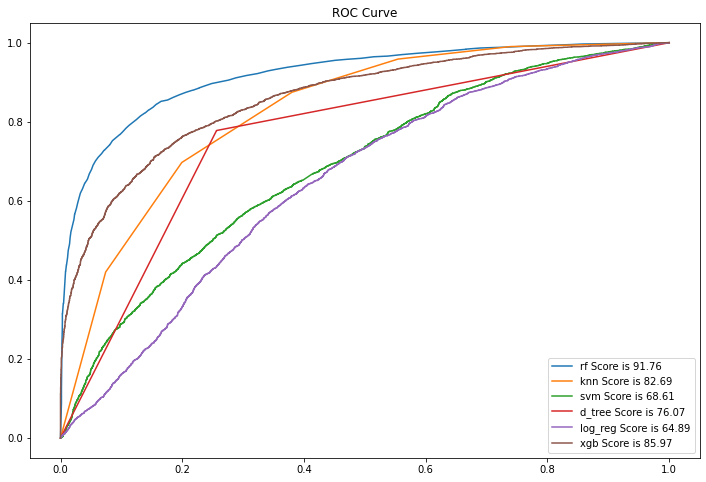

In [ ]:
def plot_auroc(allmodel, x_test):
  i = 0
  for model in allmodel:
    pred_prob = model.predict_proba(x_test)[:, 1]
    roc_sc = roc_auc_score(y_test, pred_prob)
    fpr, tpr, _ = roc_curve(y_test, pred_prob)
    plt.plot(fpr, tpr, label = mod_list[i]+ ' Score is ' + str(np.round(roc_sc*100, 2)))
    plt.title('ROC Curve')
    plt.legend()
    i += 1
        
plot_auroc([rf, knn, svm, tree, lr, xg], X_test)
plt.show()

Good result with Random forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = [
          {'criterion' :['gini'], 'n_estimators' : [100, 300, 500], 'max_depth' : [5, 8, 15],
          'min_samples_split' : [2, 5, 10], 'min_samples_leaf' : [1, 2, 5]},
          {'criterion' :['entropy'], 'n_estimators' : [100, 300, 500], 'max_depth' : [5, 8, 15],
          'min_samples_split' : [2, 5, 10], 'min_samples_leaf' : [1, 2, 5]}
]

In [ ]:
model = RandomForestClassifier()

In [ ]:
rs = RandomizedSearchCV(estimator=model, param_distributions= params, scoring='accuracy', cv = 10, n_jobs= -1)

In [ ]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions=[{'criterion': ['gini'],
                                         'max_depth': [5, 8, 15],
                                         'min_samples_leaf': [1, 2, 5],
                                         'min_samples_split': [2, 5, 10],
                                         'n_estimators': [100, 300, 500]},
                                        {'criterion': ['entropy'],
                                         'max_depth': [5, 8, 15],
                                         'min_samples_leaf': [1, 2, 5],
                                         'min_samples_split': [2, 5, 10],
                                         'n_estimators': [100, 300, 500]}],
                   scoring='accuracy')

In [ ]:
rs.best_score_

0.813731290052349

In [ ]:
rs.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [ ]:
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 500).fit(X_train, y_train)

In [ ]:
pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
accuracy_score(y_test, pred)

0.8095034246575342

In [ ]:
confusion_matrix(y_test, pred)

array([[3829,  742],
       [1038, 3735]])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      4571
           1       0.83      0.78      0.81      4773

    accuracy                           0.81      9344
   macro avg       0.81      0.81      0.81      9344
weighted avg       0.81      0.81      0.81      9344



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(rf, X_train, y_train, scoring = 'accuracy', cv = 5)

array([0.8081862 , 0.80214047, 0.80575251, 0.81538462, 0.81632107])

In [ ]:
rf.feature_importances_

array([0.04663148, 0.03770091, 0.02564731, 0.04079644, 0.03588038,
       0.10352754, 0.07532825, 0.04637449, 0.03467015, 0.03089292,
       0.02619786, 0.05253242, 0.04267397, 0.03899133, 0.03750673,
       0.03635318, 0.03520656, 0.05358338, 0.04823001, 0.04078478,
       0.03829698, 0.0351182 , 0.03707474])

In [ ]:
cols = list(df.columns)[:-1]

In [ ]:
dd = pd.DataFrame({'Imp':rf.feature_importances_}, index = cols)
dd = dd.sort_values(by = 'Imp', ascending = False)
dd

,Imp
PAY_0,0.103528
PAY_2,0.075328
PAY_AMT1,0.053583
BILL_AMT1,0.052532
PAY_AMT2,0.048230
LIMIT_BAL,0.046631
PAY_3,0.046374
BILL_AMT2,0.042674
MARRIAGE,0.040796
PAY_AMT3,0.040785


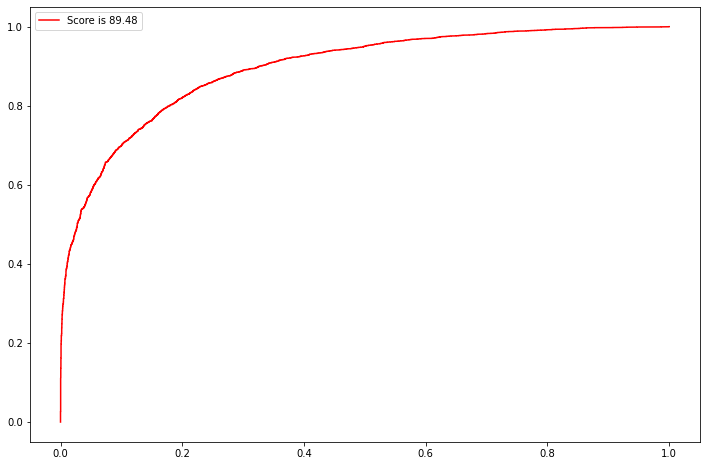

In [ ]:
def plot_roc(model, X_test):
  pred_prob = model.predict_proba(X_test)[:, 1]
  roc_sc = roc_auc_score(y_test, pred_prob)
  fpr, tpr, _ = roc_curve(y_test, pred_prob)
  plt.plot(fpr, tpr, color = 'red', label = 'Score is '+ str(np.round(roc_sc * 100, 2)))
  plt.legend()
  plt.show()

plot_roc(rf, X_test)